In [ ]:
#Use decision trees to prepare a model on fraud data
#treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

#Data Description :

#Undergrad : person is under graduated or not
#Marital.Status : marital status of a person
#Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government
#Work Experience : Work experience of an individual person
#Urban : Whether that person belongs to urban area or not

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
fraud_data = pd.read_csv('Fraud_check.csv')

In [ ]:
# Convert the 'Taxable.Income' variable to categorical (Risky/Good)
fraud_data['Income_Category'] = pd.cut(fraud_data['Taxable.Income'], bins=[-float('inf'), 30000, float('inf')], labels=['Risky', 'Good'])

In [ ]:
# Selecting features and target variable
features = fraud_data.drop(['Taxable.Income', 'Income_Category'], axis=1)
target = fraud_data['Income_Category']

In [ ]:
# Convert categorical variables to numerical using one-hot encoding
features = pd.get_dummies(features, columns=['Undergrad', 'Marital.Status', 'Urban'])

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Build the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Display the decision tree rules
tree_rules = export_text(model, feature_names=list(features.columns))
print("Decision Tree Rules:")
print(tree_rules)

Decision Tree Rules:
|--- Marital.Status_Married <= 0.50
|   |--- Work.Experience <= 29.50
|   |   |--- Work.Experience <= 23.50
|   |   |   |--- Work.Experience <= 6.50
|   |   |   |   |--- City.Population <= 170738.00
|   |   |   |   |   |--- City.Population <= 108091.00
|   |   |   |   |   |   |--- Work.Experience <= 1.50
|   |   |   |   |   |   |   |--- City.Population <= 76754.00
|   |   |   |   |   |   |   |   |--- City.Population <= 55891.00
|   |   |   |   |   |   |   |   |   |--- class: Good
|   |   |   |   |   |   |   |   |--- City.Population >  55891.00
|   |   |   |   |   |   |   |   |   |--- class: Risky
|   |   |   |   |   |   |   |--- City.Population >  76754.00
|   |   |   |   |   |   |   |   |--- class: Good
|   |   |   |   |   |   |--- Work.Experience >  1.50
|   |   |   |   |   |   |   |--- class: Good
|   |   |   |   |   |--- City.Population >  108091.00
|   |   |   |   |   |   |--- City.Population <= 108718.00
|   |   |   |   |   |   |   |--- class: Risky
|   |   |

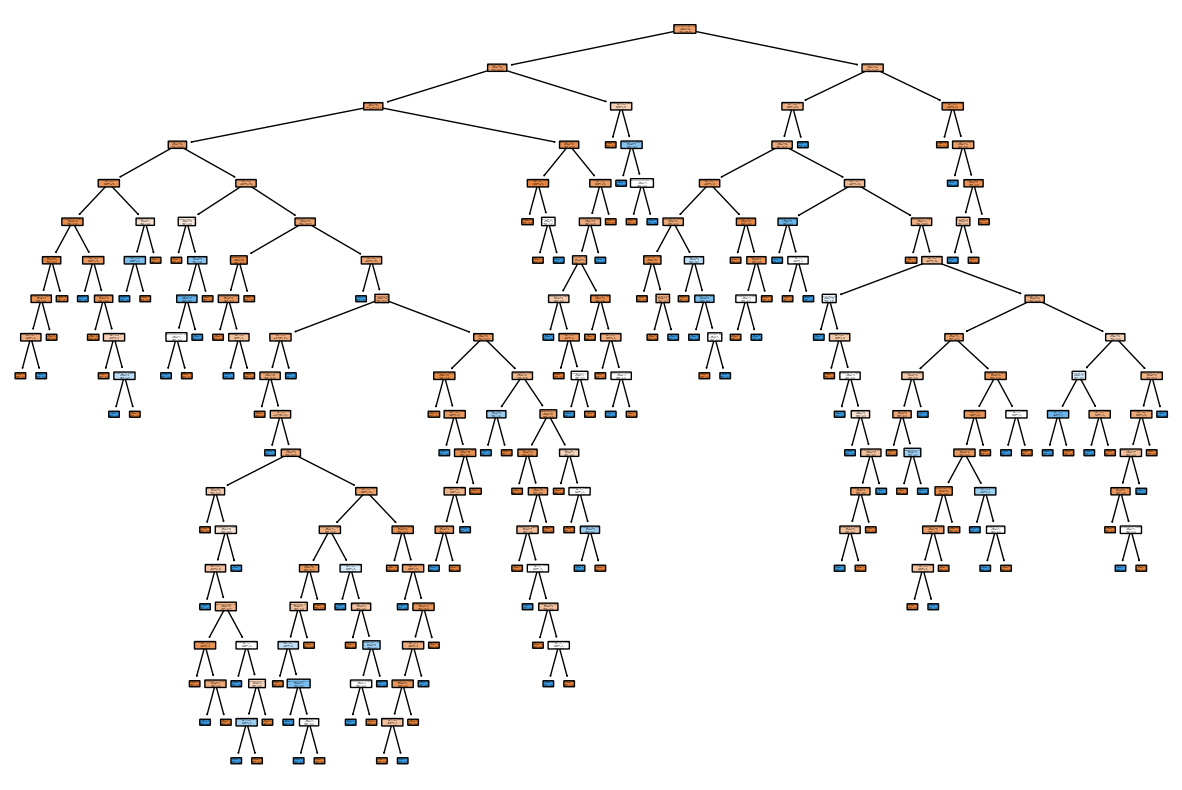

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=list(features.columns), class_names=model.classes_, filled=True, rounded=True)
plt.show()

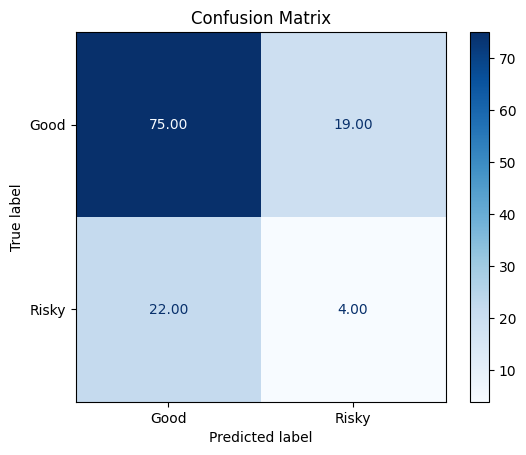

In [ ]:
# Compute and visualize the confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='.2f')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print(f"\nAccuracy on Test Set: {accuracy:.2f}")


Accuracy on Test Set: 0.66
